In [14]:
import os
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

plt.style.use("ggplot")



plt.rcParams.update({
    "text.usetex": False,
    "font.family": "Helvetica"
})

In [15]:
import dataframe_image as dfi


def summary_statistics(df, filename):
    """
    Generate summary statistics for numerical columns.
    """

    # Save the summary statistics to a DataFrame
    summary = df.describe()

    df_styled = summary.style.background_gradient() #adding a gradient based on values in cell


    dfi.export(df_styled, f"{filename}.png")

    # summary.to_csv(f"{filename}.csv")

    return df.describe()



def boxplot_analysis(df, class_column):
    """
    Create box plots for each numerical feature, grouped by class.
    """
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    num_cols = len(numerical_columns)
    fig, axes = plt.subplots(num_cols, 1, figsize=(12, 5*num_cols))
    
    for i, col in enumerate(numerical_columns):
        if col != class_column:
            sns.boxplot(data=df, x=class_column, y=col, ax=axes[i])
            axes[i].set_title(f'Box Plot of {col} by {class_column}')
    
    plt.tight_layout()
    plt.show()

def scatter_plot_matrix(df, class_column):
    """
    Create a scatter plot matrix for the first few numerical features.
    """
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    plot_columns = [col for col in numerical_columns if col != class_column][:5]  # Limit to first 5 for readability
    sns.pairplot(df[plot_columns + [class_column]], hue=class_column, height=2.5)
    plt.tight_layout()
    plt.show()

def perform_eda(df, class_column):
    """
    Perform all EDA functions on the dataframe.
    """
    print("Summary Statistics:")
    print(summary_statistics(df))
    print("\nClass Balance Check:")
    class_balance_check(df, class_column)
    # print("\nDistribution Analysis:")
    # distribution_analysis(df, class_column)
    print("\nCorrelation Analysis:")
    correlation_analysis(df, class_column)
    # print("\nFeature Importance:")
    # feature_importance(df, class_column)
    # print("\nBox Plot Analysis:")
    # boxplot_analysis(df, class_column)
    print("\nScatter Plot Matrix:")
    scatter_plot_matrix(df, class_column)

In [16]:
CSVs = glob("./tmp/*_balanced.csv")

CSVs

['./tmp/bank-additional-full_normalised.csv_balanced.csv',
 './tmp/KDD2014_donors_10feat_nomissing_normalised.csv_balanced.csv',
 './tmp/UNSW_NB15_traintest_backdoor.csv_balanced.csv',
 './tmp/celeba_baldvsnonbald_normalised.csv_balanced.csv']

In [48]:
def correlation_analysis(df, class_column, filename):
    """
    Generate and plot a correlation matrix for numerical features.
    """
    plt.clf()

    corr_matrix = df.drop(columns=[class_column]).corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Matrix of Numerical Features')
    # plt.show()

    # Save plot
    plt.savefig(filename)

    return corr_matrix




def feature_importance(df, class_column, filename):
    """
    Calculate feature importance using mutual information.
    """
    X = df.drop(columns=[class_column])
    y = df[class_column]
    
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=mi_scores.values, y=mi_scores.index)
    plt.title('Feature Importance (Mutual Information)')
    plt.xlabel('Mutual Information Score')
    plt.tight_layout()
    
    # Set x-ticks font size

    plt.xticks(fontsize=8)

    # plt.show()

    # Save plot
    plt.savefig(filename)
    
    return mi_scores

./tmp/bank-additional-full_normalised.csv_balanced.csv
./tmp/KDD2014_donors_10feat_nomissing_normalised.csv_balanced.csv
./tmp/UNSW_NB15_traintest_backdoor.csv_balanced.csv
./tmp/celeba_baldvsnonbald_normalised.csv_balanced.csv


<Figure size 640x480 with 0 Axes>

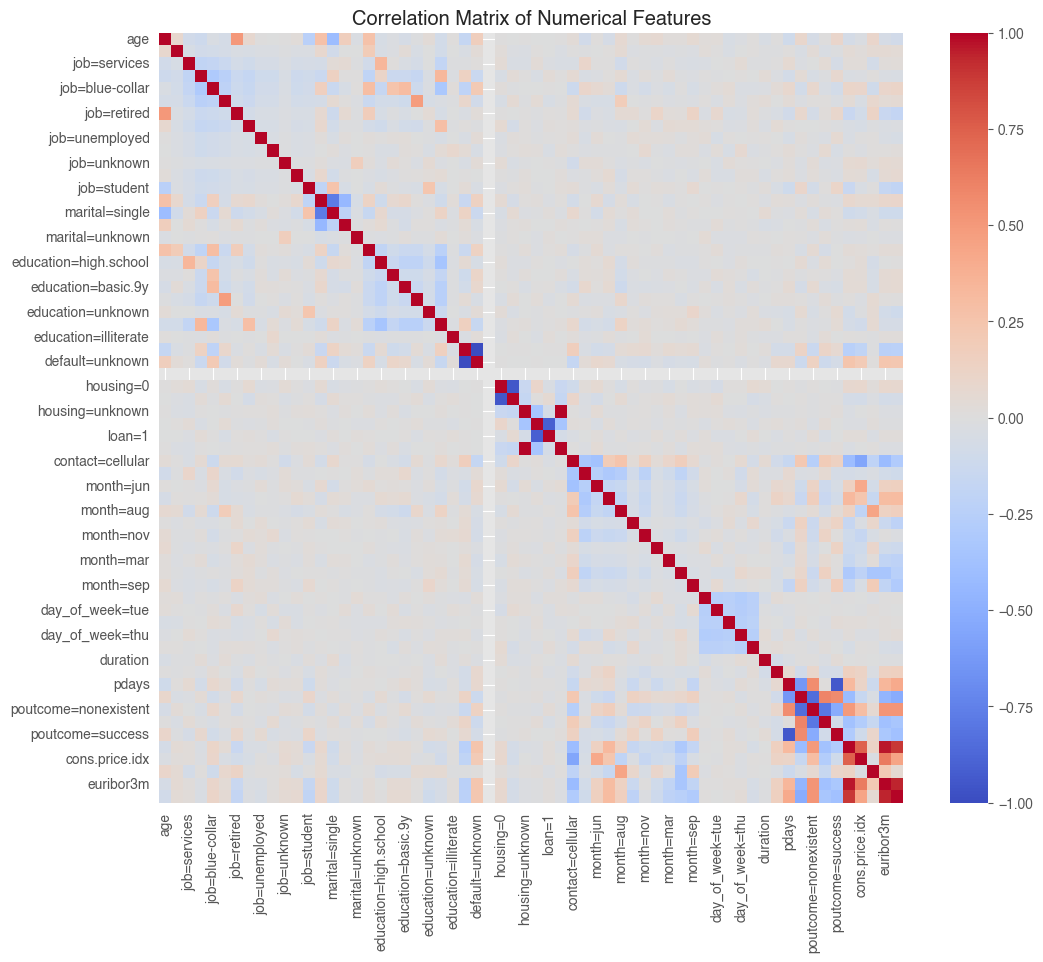

<Figure size 1000x600 with 0 Axes>

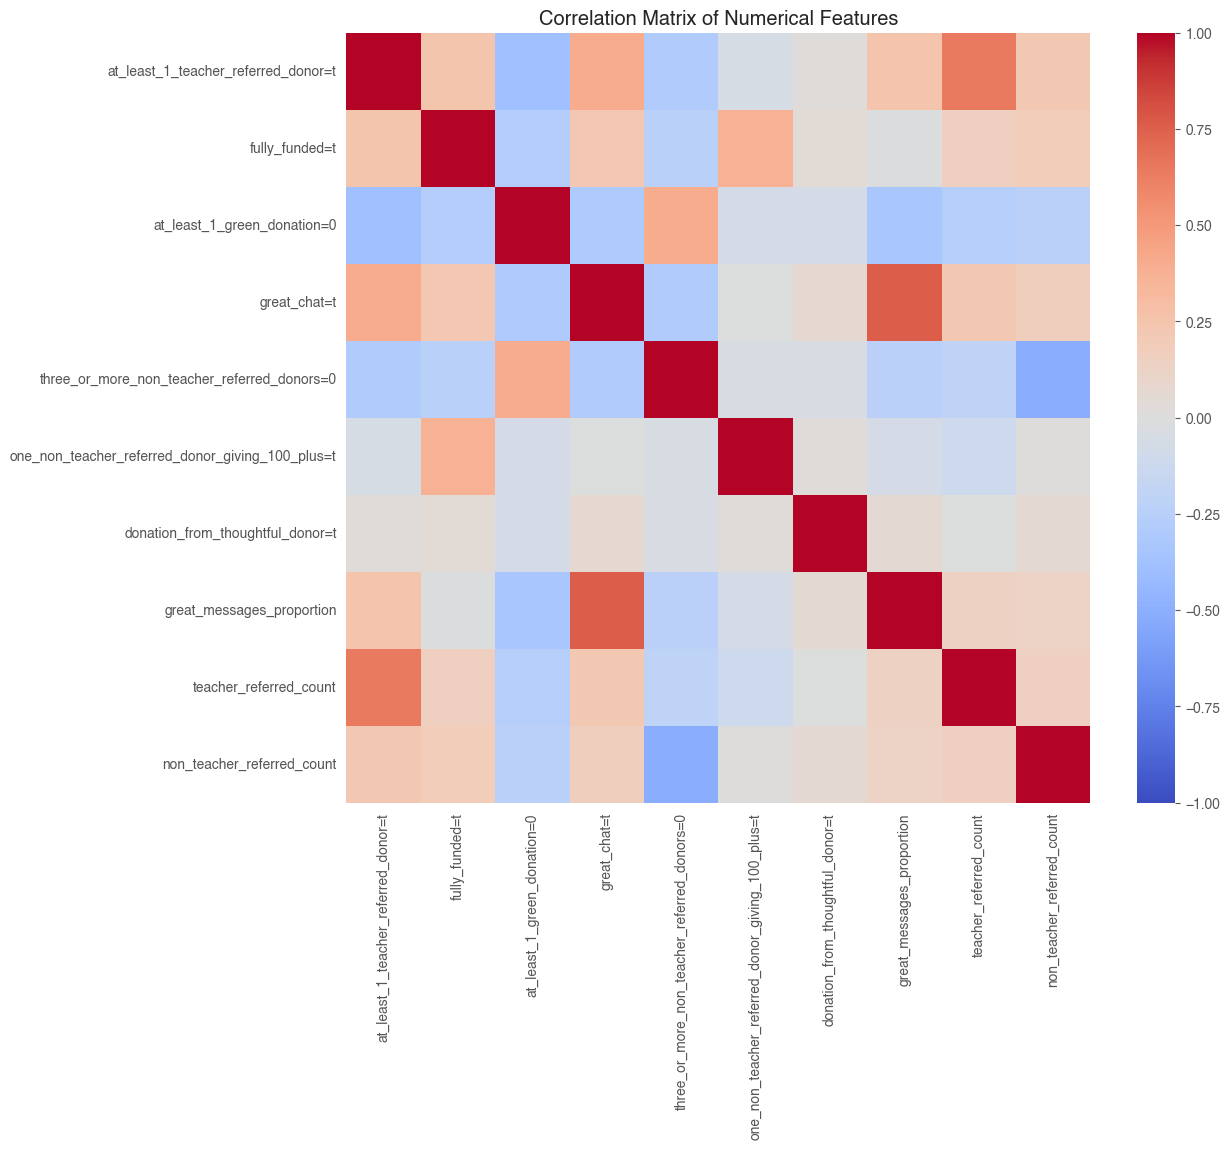

<Figure size 1000x600 with 0 Axes>

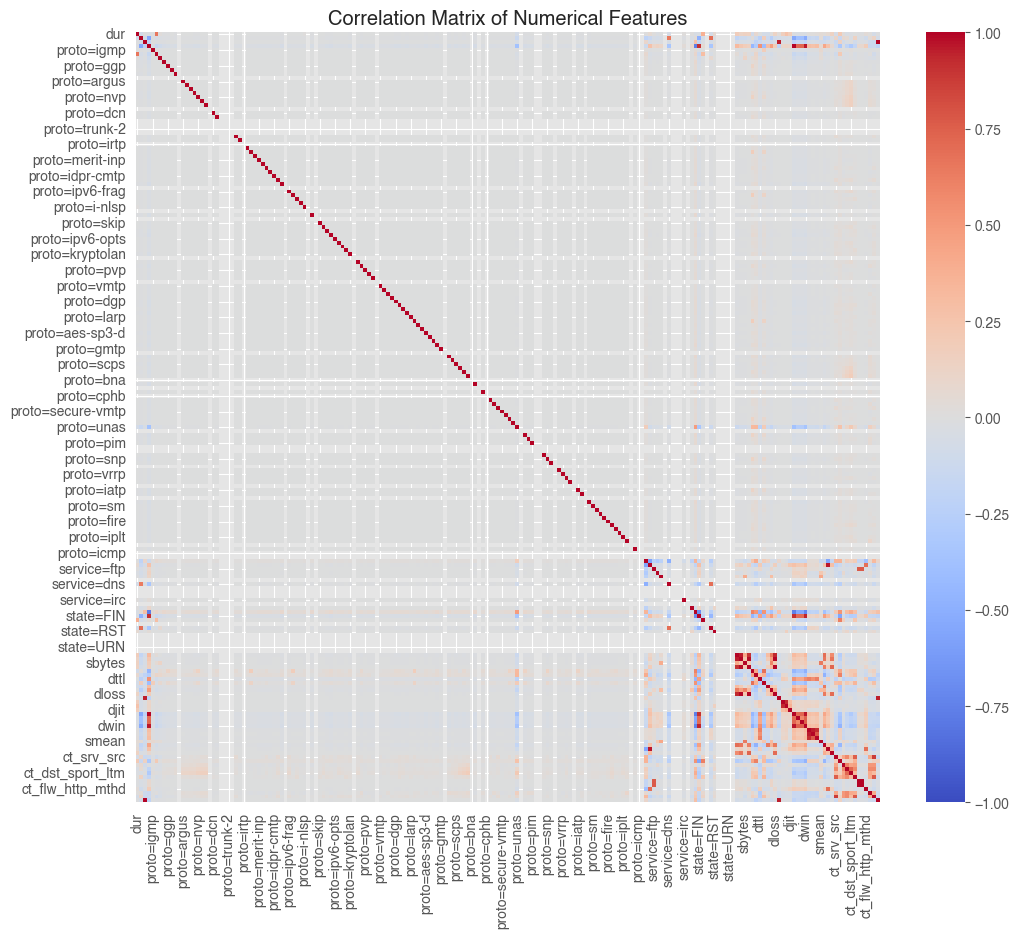

<Figure size 1000x600 with 0 Axes>

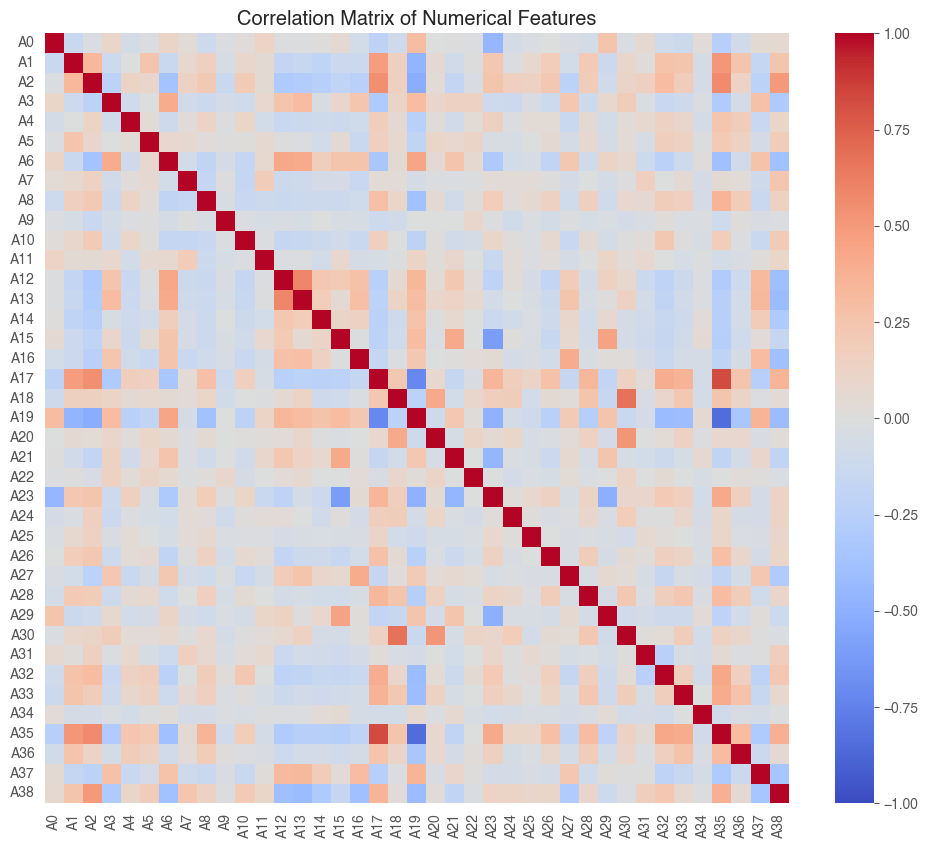

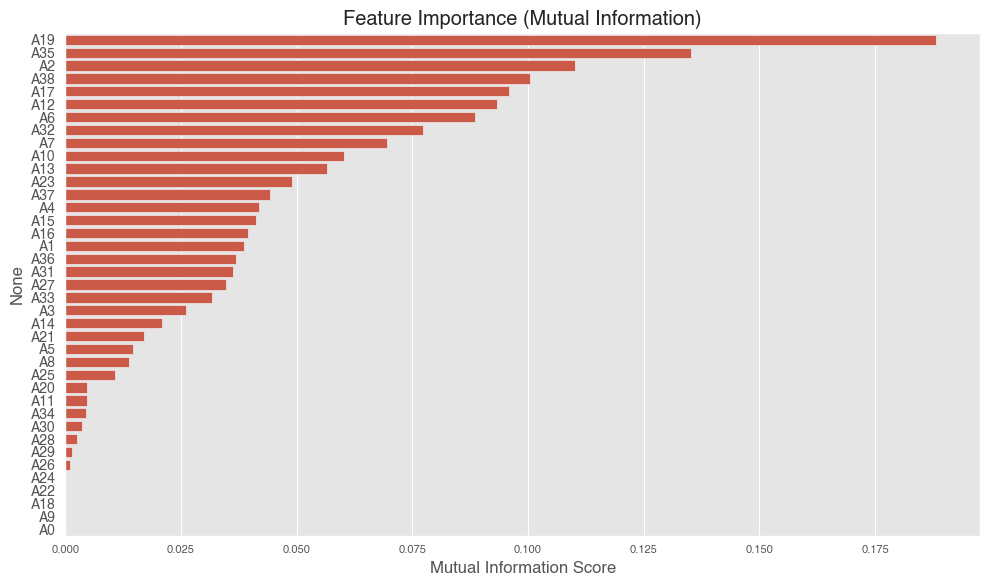

In [49]:
for _csv in CSVs:
    print(_csv)

    filename = _csv.replace('/tmp', '/reports/').split('.csv')[0] 

    # print(f"./reports/{_csv.split('.csv')[0]}_correlation.png")

    df = pd.read_csv(_csv)
    correlation_analysis(df, "class", filename + '_correlation.png')

    feature_importance(df, "class", filename + '_feature_importance.png')
    # print(summary_statistics(df))



Class distribution:
class
0    1500
1     500
Name: count, dtype: int64


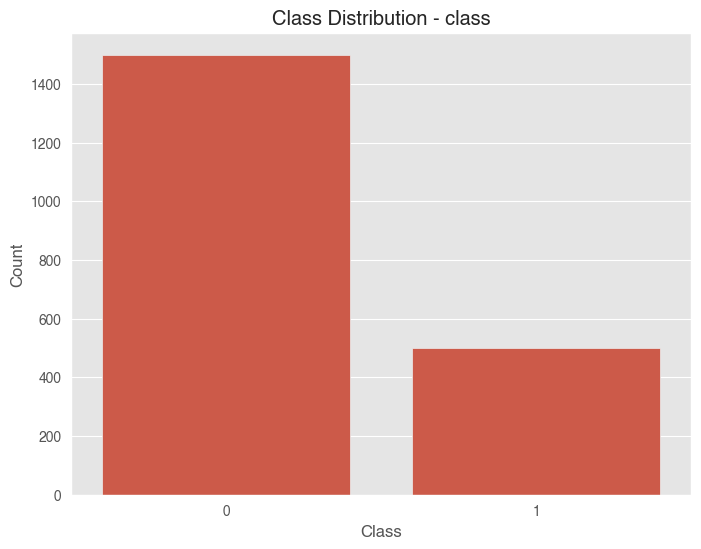

In [52]:
def class_balance_check(df, class_column):
    """
    Check the balance of classes and visualize it.
    """
    class_counts = df[class_column].value_counts()
    print("Class distribution:")
    print(class_counts)
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title(f'Class Distribution - {class_column}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()


class_balance_check(df, "class")

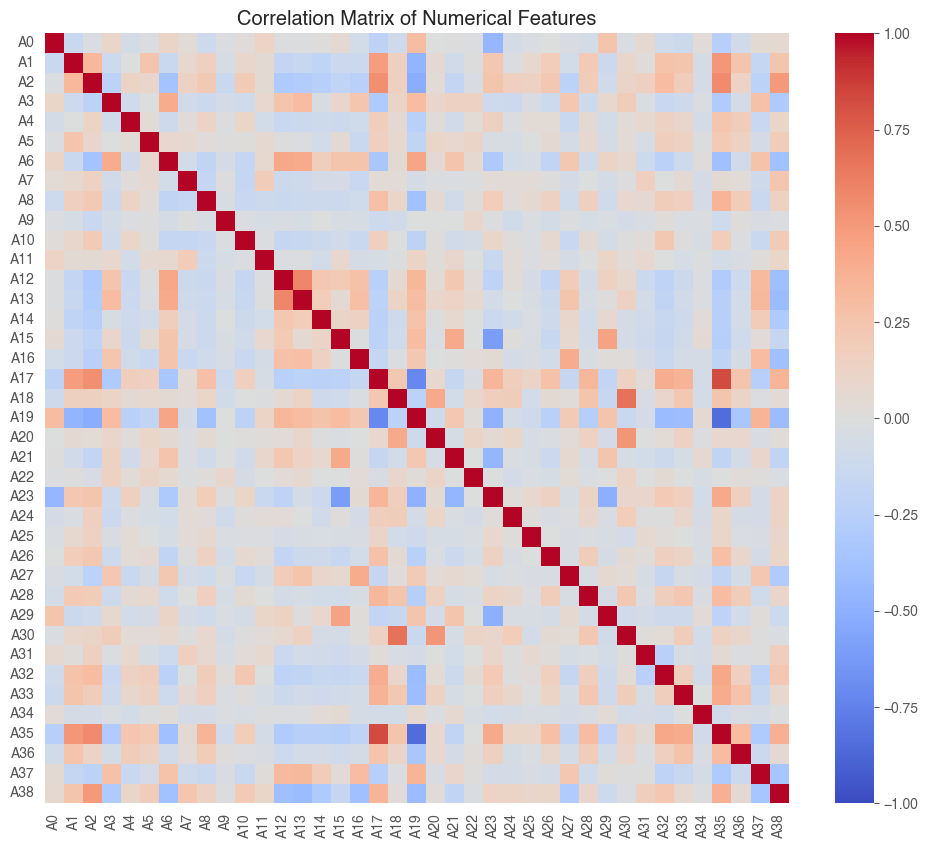

A0        A1        A2        A3        A4        A5        A6  \
A0   1.000000 -0.134085 -0.029525  0.104441 -0.070354 -0.018268  0.113260   
A1  -0.134085  1.000000  0.329963 -0.112442 -0.001863  0.250285 -0.134768   
A2  -0.029525  0.329963  1.000000 -0.225089  0.121837  0.101532 -0.364517   
A3   0.104441 -0.112442 -0.225089  1.000000 -0.101140 -0.005468  0.404205   
A4  -0.070354 -0.001863  0.121837 -0.101140  1.000000  0.044777 -0.104582   
A5  -0.018268  0.250285  0.101532 -0.005468  0.044777  1.000000  0.085531   
A6   0.113260 -0.134768 -0.364517  0.404205 -0.104582  0.085531  1.000000   
A7   0.044924  0.073215  0.139250 -0.089752  0.030357  0.067880 -0.080667   
A8  -0.113113  0.163868  0.216522 -0.123155  0.117370  0.028038 -0.189970   
A9  -0.020846 -0.053783 -0.136736 -0.073281 -0.021144  0.004275 -0.055305   
A10  0.025618  0.090056  0.199304 -0.093799  0.109248  0.014742 -0.167056   
A11  0.132788  0.048114  0.049513  0.085343 -0.079703  0.062888  0.075790   
A12 -0.011616 -0.175241 -0.302752  0.246826 -0.145308  0.003780  0.425885   
A13 -0.014759 -0.155093 -0.282246  0.307134 -0.132637 -0.018881  0.408516   
A14  0.009169 -0.195451 -0.254817 -0.040425 -0.102244 -0.082499  0.166163   
A15  0.062380 -0.127511 -0.199442  0.098310 -0.120415  0.049370  0.245126   
A16 -0.085206 -0.131608 -0.239162  0.239650 -0.094578 -0.135243  0.255075   
A17 -0.217882  0.477646  0.547575 -0.300001  0.169424  0.159455 -0.342514   
A18 -0.107478  0.155033  0.148736  0.111821  0.062164  0.072029  0.048814   
A19  0.303428 -0.468335 -0.513400  0.308131 -0.248938 -0.188266  0.441162   
A20 -0.005609  0.056731  0.040292  0.095903  0.019738  0.106114  0.055759   
A21  0.002983 -0.089422 -0.176919  0.142470 -0.091169  0.084302  0.252600   
A22 -0.017062  0.007172 -0.036733  0.134935  0.041359  0.109772  0.066904   
A23 -0.448228  0.227201  0.245799 -0.114318  0.150070 -0.039073 -0.305018   
A24 -0.067822 -0.028345  0.159154 -0.125235 -0.018401 -0.049113 -0.081047   
A25 -0.025765  0.072239  0.136140 -0.038551  0.046869 -0.004011 -0.050400   
A26 -0.005074  0.180632  0.219024 -0.116224  0.039637  0.061325 -0.189539   
A27 -0.034960 -0.081896 -0.222870  0.232891 -0.138138 -0.057545  0.224693   
A28 -0.076216  0.204308  0.192806 -0.112779  0.048269  0.076327 -0.095190   
A29  0.252190 -0.118470 -0.100964  0.073904 -0.082332 -0.057650  0.117034   
A30 -0.023759  0.087298  0.109833  0.175702  0.044817  0.035043  0.077463   
A31  0.063832  0.018899  0.148717 -0.025176  0.073249 -0.050685 -0.112294   
A32 -0.099281  0.265520  0.307622 -0.144903  0.136202  0.167110 -0.226670   
A33 -0.118070  0.244663  0.176952 -0.102171  0.089752  0.142471 -0.110111   
A34  0.035088 -0.057562 -0.069392 -0.024389 -0.072261 -0.014948  0.019853   
A35 -0.257743  0.510250  0.564139 -0.294152  0.235025  0.209143 -0.388010   
A36 -0.092959  0.257076  0.130940 -0.073516  0.172680  0.136701 -0.093081   
A37  0.050201 -0.169308 -0.220180  0.270535 -0.141570 -0.066948  0.264569   
A38  0.063327  0.244857  0.495124 -0.301417  0.109256  0.175957 -0.375356   

           A7        A8        A9  ...       A29       A30       A31  \
A0   0.044924 -0.113113 -0.020846  ...  0.252190 -0.023759  0.063832   
A1   0.073215  0.163868 -0.053783  ... -0.118470  0.087298  0.018899   
A2   0.139250  0.216522 -0.136736  ... -0.100964  0.109833  0.148717   
A3  -0.089752 -0.123155 -0.073281  ...  0.073904  0.175702 -0.025176   
A4   0.030357  0.117370 -0.021144  ... -0.082332  0.044817  0.073249   
A5   0.067880  0.028038  0.004275  ... -0.057650  0.035043 -0.050685   
A6  -0.080667 -0.189970 -0.055305  ...  0.117034  0.077463 -0.112294   
A7   1.000000 -0.169100  0.001948  ... -0.057092  0.003384  0.162254   
A8  -0.169100  1.000000 -0.044087  ... -0.094574  0.081415  0.063719   
A9   0.001948 -0.044087  1.000000  ... -0.024598 -0.064903 -0.034272   
A10 -0.171872 -0.142843 -0.020422  ... -0.057841  0.002339  0.023630   
A11  0.191539 -0.117725 -0.047457  ...  0.109251  0.039024  0.0751

In [53]:
def correlation_analysis(df, class_column):
    """
    Generate and plot a correlation matrix for numerical features.
    """
    corr_matrix = df.drop(columns=[class_column]).corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()
    return corr_matrix


correlation_analysis(df, 'class')

In [54]:
def distribution_analysis(df, class_column):

  rows = df.shape[0]
  cols = df.shape[1]

  fig, axes = plt.subplots(rows + 1, cols, figsize=(20, 20))

  # targetによるデータフレームのソート
  normal = df[df[class_column] == 0]
  fraud = df[df[class_column] == 1]

  ax = axes.ravel()
  # 説明変数1~30のグラフ作成、dfはtargetと結合しているためインデックスに注意
  for i in range(30):
    _, bins = np.histogram(df.iloc[:,i+1], bins=50)
    ax[i].hist(normal.iloc[:,i+1].values, bins=bins, alpha=1)
    ax[i].hist(fraud.iloc[:,i+1].values, bins=bins, alpha=1)
    ax[i].set_title(df.columns[i+1])
    ax[i].set_yticks(())
  ax[0].set_xlabel("Feature magnitude")
  ax[0].set_ylabel("Frequency")
  ax[0].legend(["normal", "anomaly"], loc="best")
  fig.tight_layout()

In [53]:
distribution_analysis(df, 'class')

KeyboardInterrupt: 

In [55]:
PCAs = glob("./tmp/*_pca.npy")

PCAs

['./tmp/bank-additional-full_normalised.csv_X_pca.npy',
 './tmp/UNSW_NB15_traintest_backdoor.csv_X_pca.npy',
 './tmp/KDD2014_donors_10feat_nomissing_normalised.csv_X_pca.npy',
 './tmp/celeba_baldvsnonbald_normalised.csv_X_pca.npy']

In [56]:
Ys = glob("./tmp/*_y.npy")


Ys

['./tmp/KDD2014_donors_10feat_nomissing_normalised.csv_y.npy',
 './tmp/bank-additional-full_normalised.csv_y.npy',
 './tmp/celeba_baldvsnonbald_normalised.csv_y.npy',
 './tmp/UNSW_NB15_traintest_backdoor.csv_y.npy']

In [57]:
for y, pca in zip(sorted(Ys), sorted(PCAs)):
    print(pca, y)
    pca_data = np.load(pca)
    y_df = np.load(y)

./tmp/KDD2014_donors_10feat_nomissing_normalised.csv_X_pca.npy ./tmp/KDD2014_donors_10feat_nomissing_normalised.csv_y.npy
./tmp/UNSW_NB15_traintest_backdoor.csv_X_pca.npy ./tmp/UNSW_NB15_traintest_backdoor.csv_y.npy
./tmp/bank-additional-full_normalised.csv_X_pca.npy ./tmp/bank-additional-full_normalised.csv_y.npy
./tmp/celeba_baldvsnonbald_normalised.csv_X_pca.npy ./tmp/celeba_baldvsnonbald_normalised.csv_y.npy


In [67]:
# Visualize the PCA components
from plotly.subplots import make_subplots
import plotly.graph_objects as go



def visualize_umap(X_pca, y, title="UMAP Projection"):
    """
    Visualize the UMAP projection of the data.
    
    Parameters:
    X_pca (numpy.ndarray): The UMAP embedding of shape (n_samples, n_components)
    y (pandas.Series or numpy.ndarray): The class labels
    title (str): The title for the plot
    """
    # Create a DataFrame for easy plotting
    df_umap = pd.DataFrame(data = X_pca, columns = [f'UMAP{i+1}' for i in range(X_pca.shape[1])])
    df_umap['class'] = y
    
    # Set up the plot style
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")
    
    # Create the scatter plot
    if X_pca.shape[1] >= 3:
        ax = plt.axes(projection='3d')
        scatter = ax.scatter(df_umap['UMAP1'], df_umap['UMAP2'], df_umap['UMAP3'], 
                             alpha=0.7, c=df_umap['class'], cmap="jet")
        ax.set_xlabel('UMAP1')
        ax.set_ylabel('UMAP2')
        ax.set_zlabel('UMAP3')
    else:
        scatter = plt.scatter(df_umap['UMAP1'], df_umap['UMAP2'], 
                               alpha=0.7, cmap="jet", c=df_umap['class'])
        plt.xlabel('UMAP1')
        plt.ylabel('UMAP2')
    
    # Add a color bar
    plt.colorbar(scatter)
    
    # Set the title
    plt.title(title)
    
    # Show the plot
    plt.show()




def visualize_umap_matrix_matplotlib(X_pca, y, filename, title="UMAP Projection Matrix"):
    """
    Create a matrix visualization of the UMAP projection using Matplotlib.

    Parameters:
    X_pca (numpy.ndarray): The UMAP embedding of shape (n_samples, n_components)
    y (pandas.Series or numpy.ndarray): The class labels
    title (str): The title for the plot
    """
    # Determine the number of UMAP components
    n_components = X_pca.shape[1]

    # Create a figure and axes for the matrix of subplots
    fig, axes = plt.subplots(n_components, n_components, figsize=(5 * n_components, 5 * n_components))

    # Generate a color for each unique class
    unique_classes = np.unique(y)
    # colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))  # Using a colormap

    # Create scatter plots for each pair of UMAP components
    for i in range(n_components):
        for j in range(n_components):
            ax = axes[i, j]
            if i != j:
                for cls in unique_classes:
                    mask = y == cls
                    ax.scatter(X_pca[mask, j], X_pca[mask, i], label=cls, s=10)
                if i == 0:
                    ax.set_title(f'UMAP{j+1}')
                if j == 0:
                    ax.set_ylabel(f'UMAP{i+1}')
            else:
                # For diagonal plots, we'll show histograms
                ax.hist(X_pca[:, i], bins=20, color='gray', alpha=0.5, label='All')
                ax.set_title(f'UMAP{i+1} Distribution')

    # Add a legend to the first subplot
    axes[0, 0].legend()
    axes[0, 1].legend(title="Class")

    # Adjust layout and display the plot
    plt.suptitle(title)
    plt.tight_layout()
    # plt.show()

    # Save plot
    plt.savefig(filename)


def distribution_analysis(df, class_column, filename):
    """
    Plot histograms for each numerical feature, colored by class, in a single figure.
    Handles LinAlgError for gaussian_kde by falling back to histogram without KDE.
    """
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    numerical_columns = [col for col in numerical_columns if col != class_column]
    num_cols = len(numerical_columns)
    
    # Calculate the number of rows and columns for the subplots
    num_rows = int(np.ceil(num_cols / 2))
    num_cols = 2
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    for i, col in enumerate(numerical_columns):
        row = i // 2
        _col = i % 2
        ax = axes[row, _col] if num_rows > 1 else axes[_col]
        
        try:
            # Try to plot with KDE
            sns.histplot(data=df, x=col, hue=class_column, kde=True, ax=ax)
        except np.linalg.LinAlgError:
            # If KDE fails, fall back to histogram without KDE
            sns.histplot(data=df, x=col, hue=class_column, kde=False, ax=ax)
            ax.set_title(f'Distribution of {col} by {class_column} (No KDE)')
        else:
            ax.set_title(f'Distribution of {col} by {class_column}')
        
        ax.legend([1, 0], title=class_column, loc='upper right')
    
    # Remove any unused subplots
    if len(numerical_columns) % 2 != 0:
        fig.delaxes(axes[-1, -1])
    
    plt.tight_layout()
    # plt.show()

    # Save plot
    plt.savefig(filename)


def create_pair_plot(df, class_column, filename):
    """
    Create a pair plot of the DataFrame.
    """
    sns.pairplot(df, hue=class_column, height=5)
    plt.tight_layout()
    # plt.show()
    # g.fig.suptitle("Pair Plot of PCA Components", y=1.02)

    # Save plot
    plt.savefig(filename)



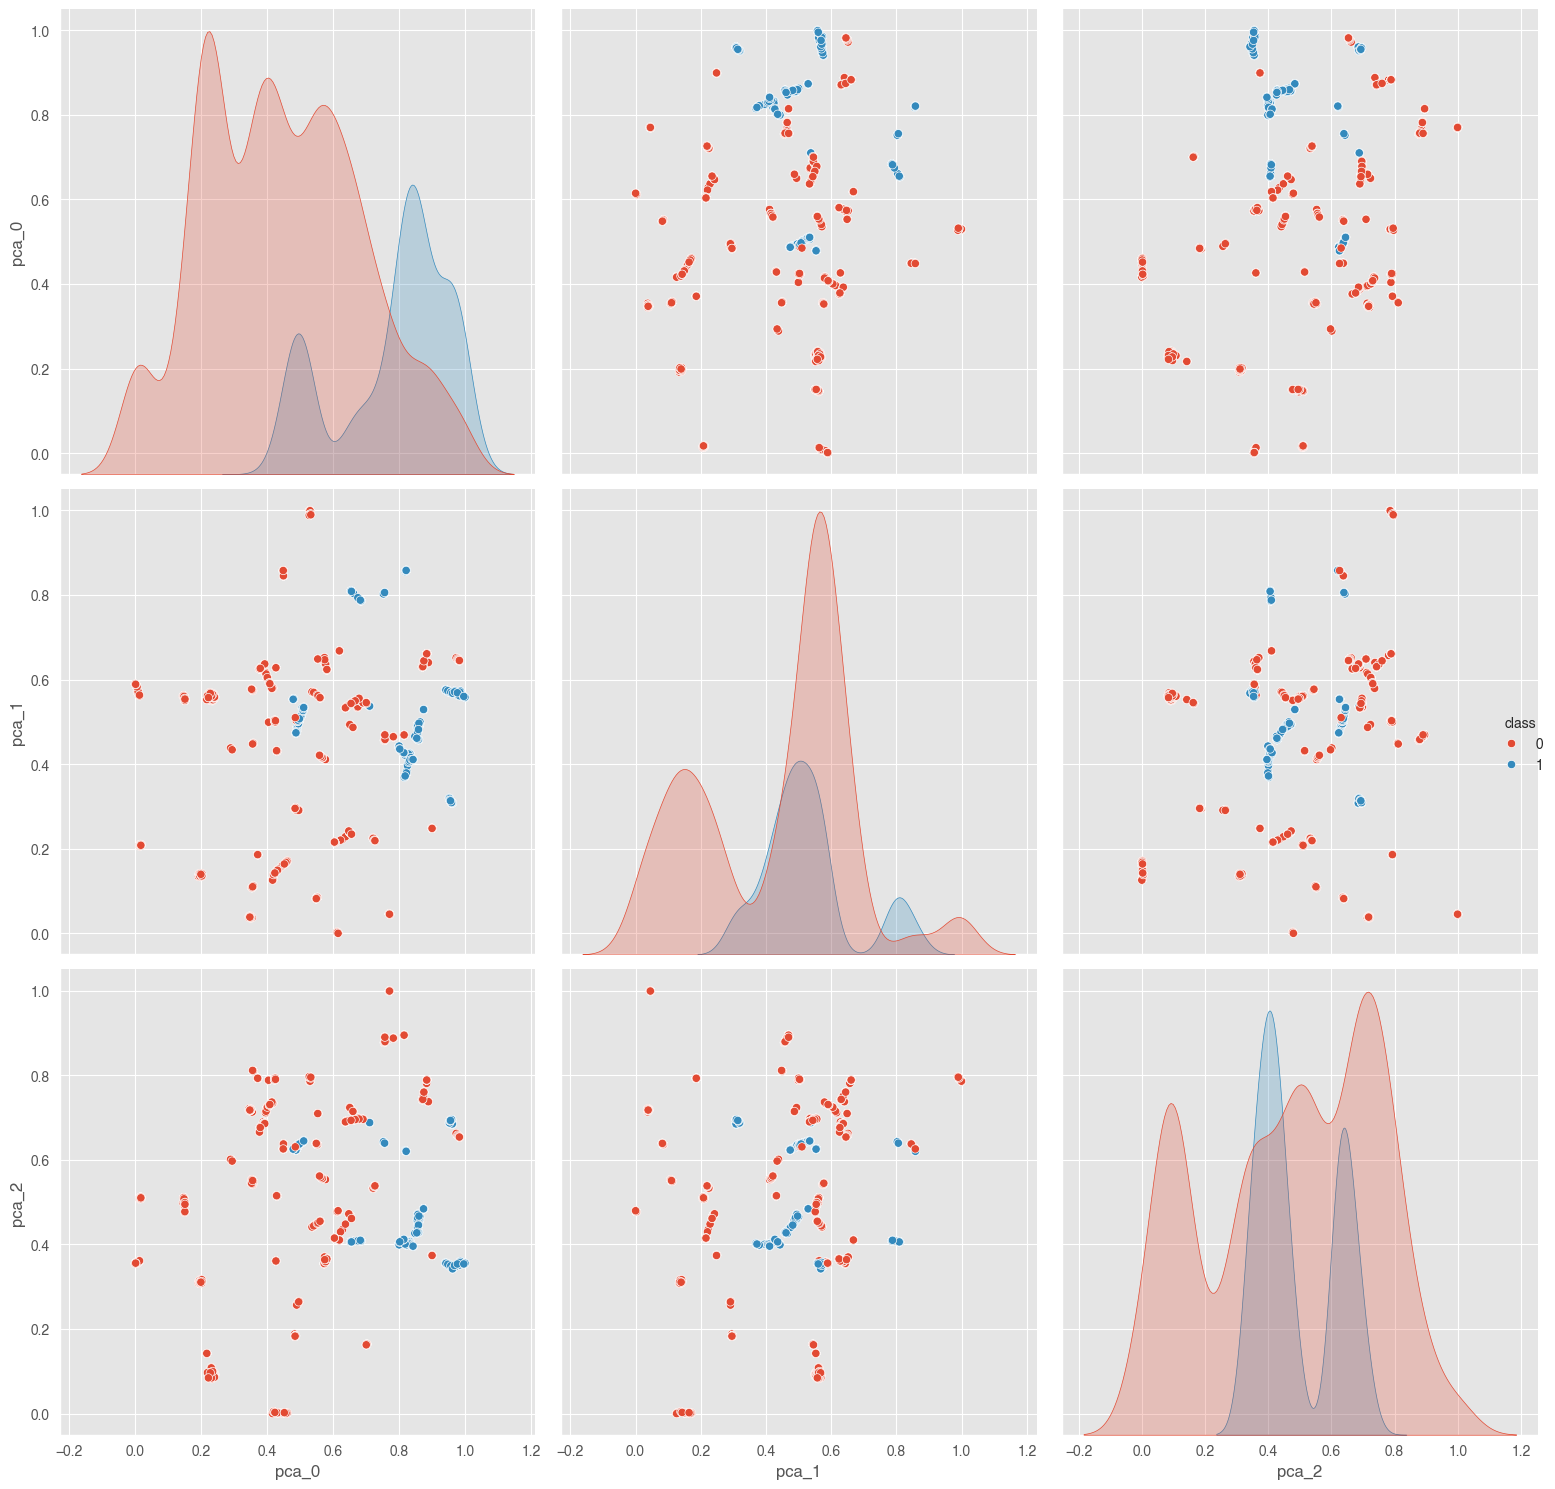

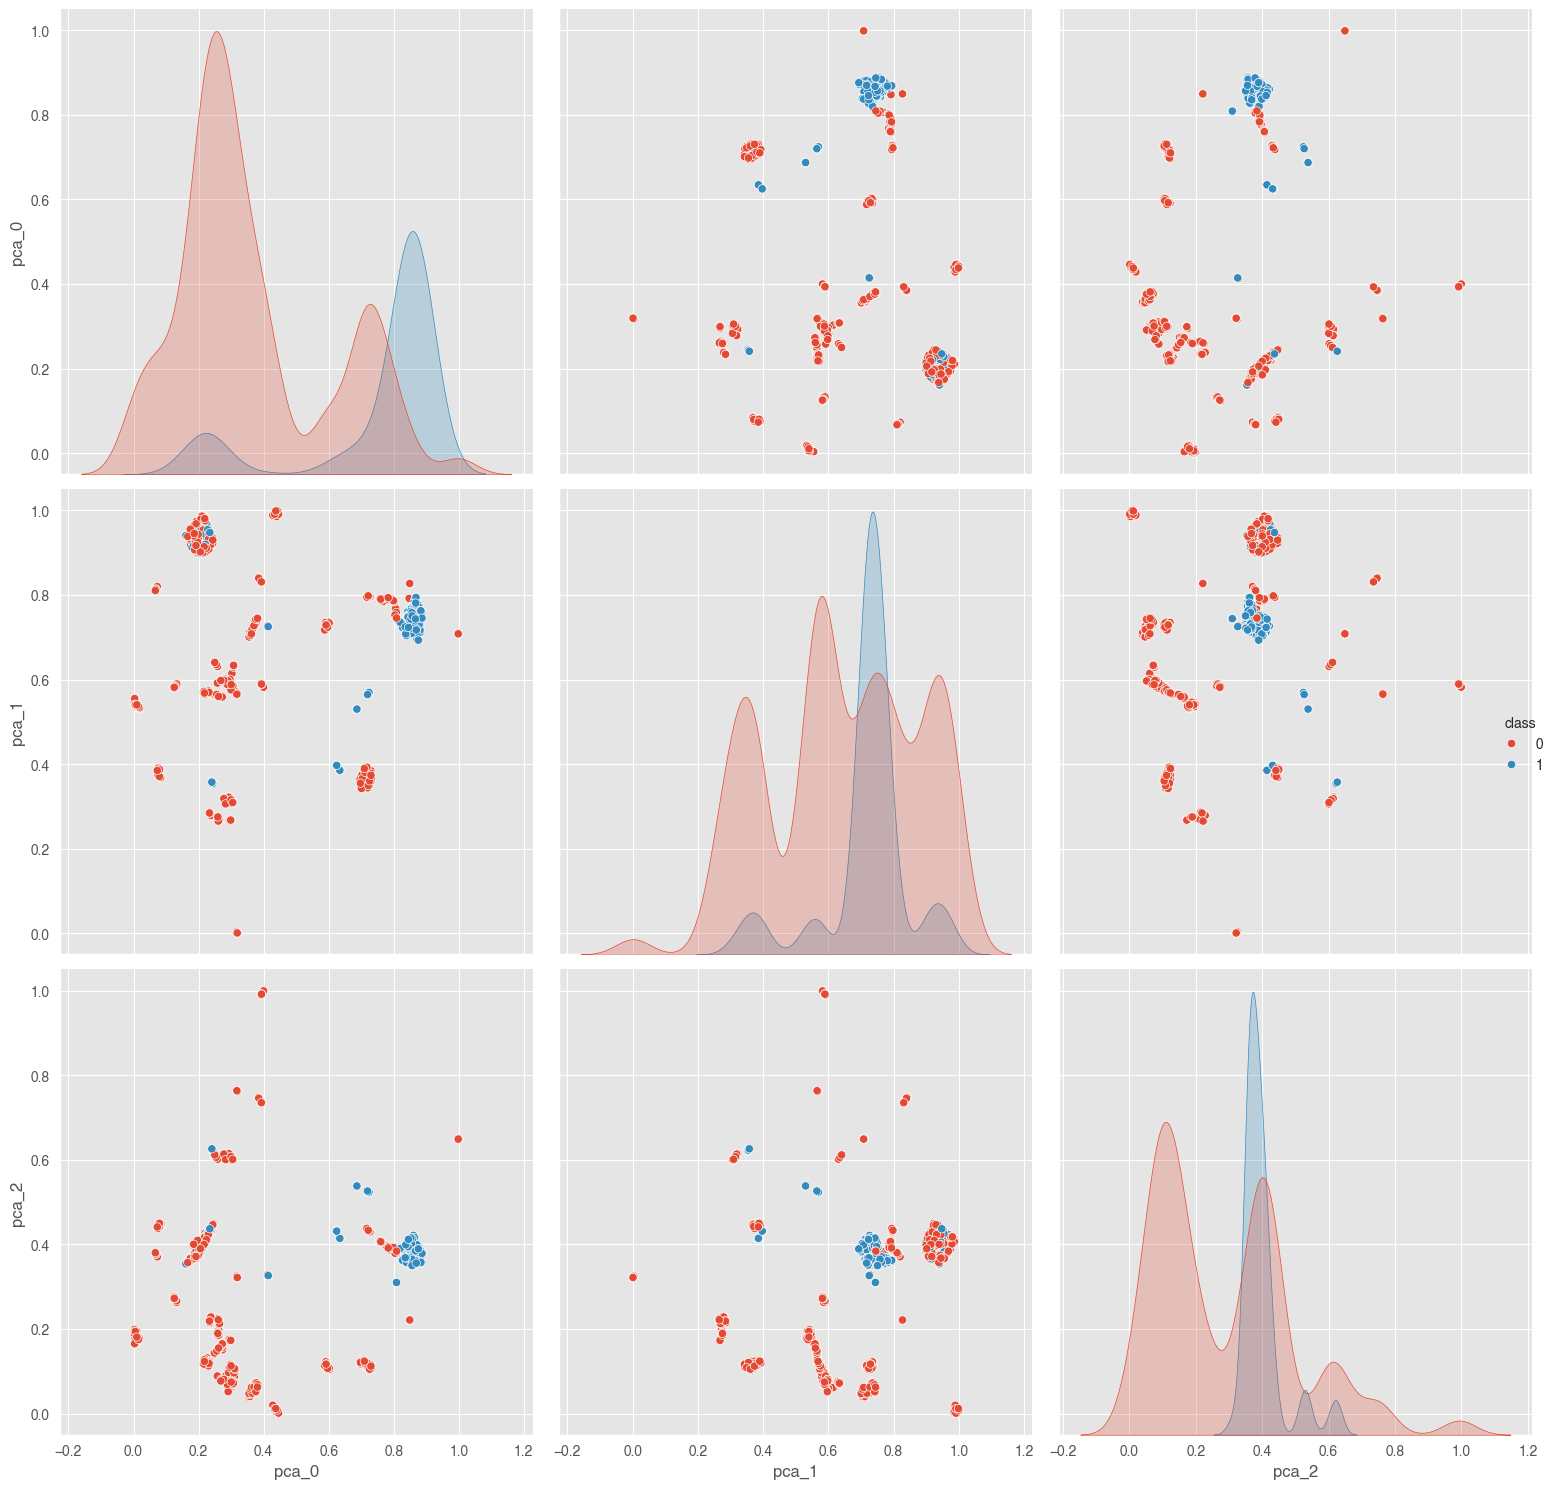

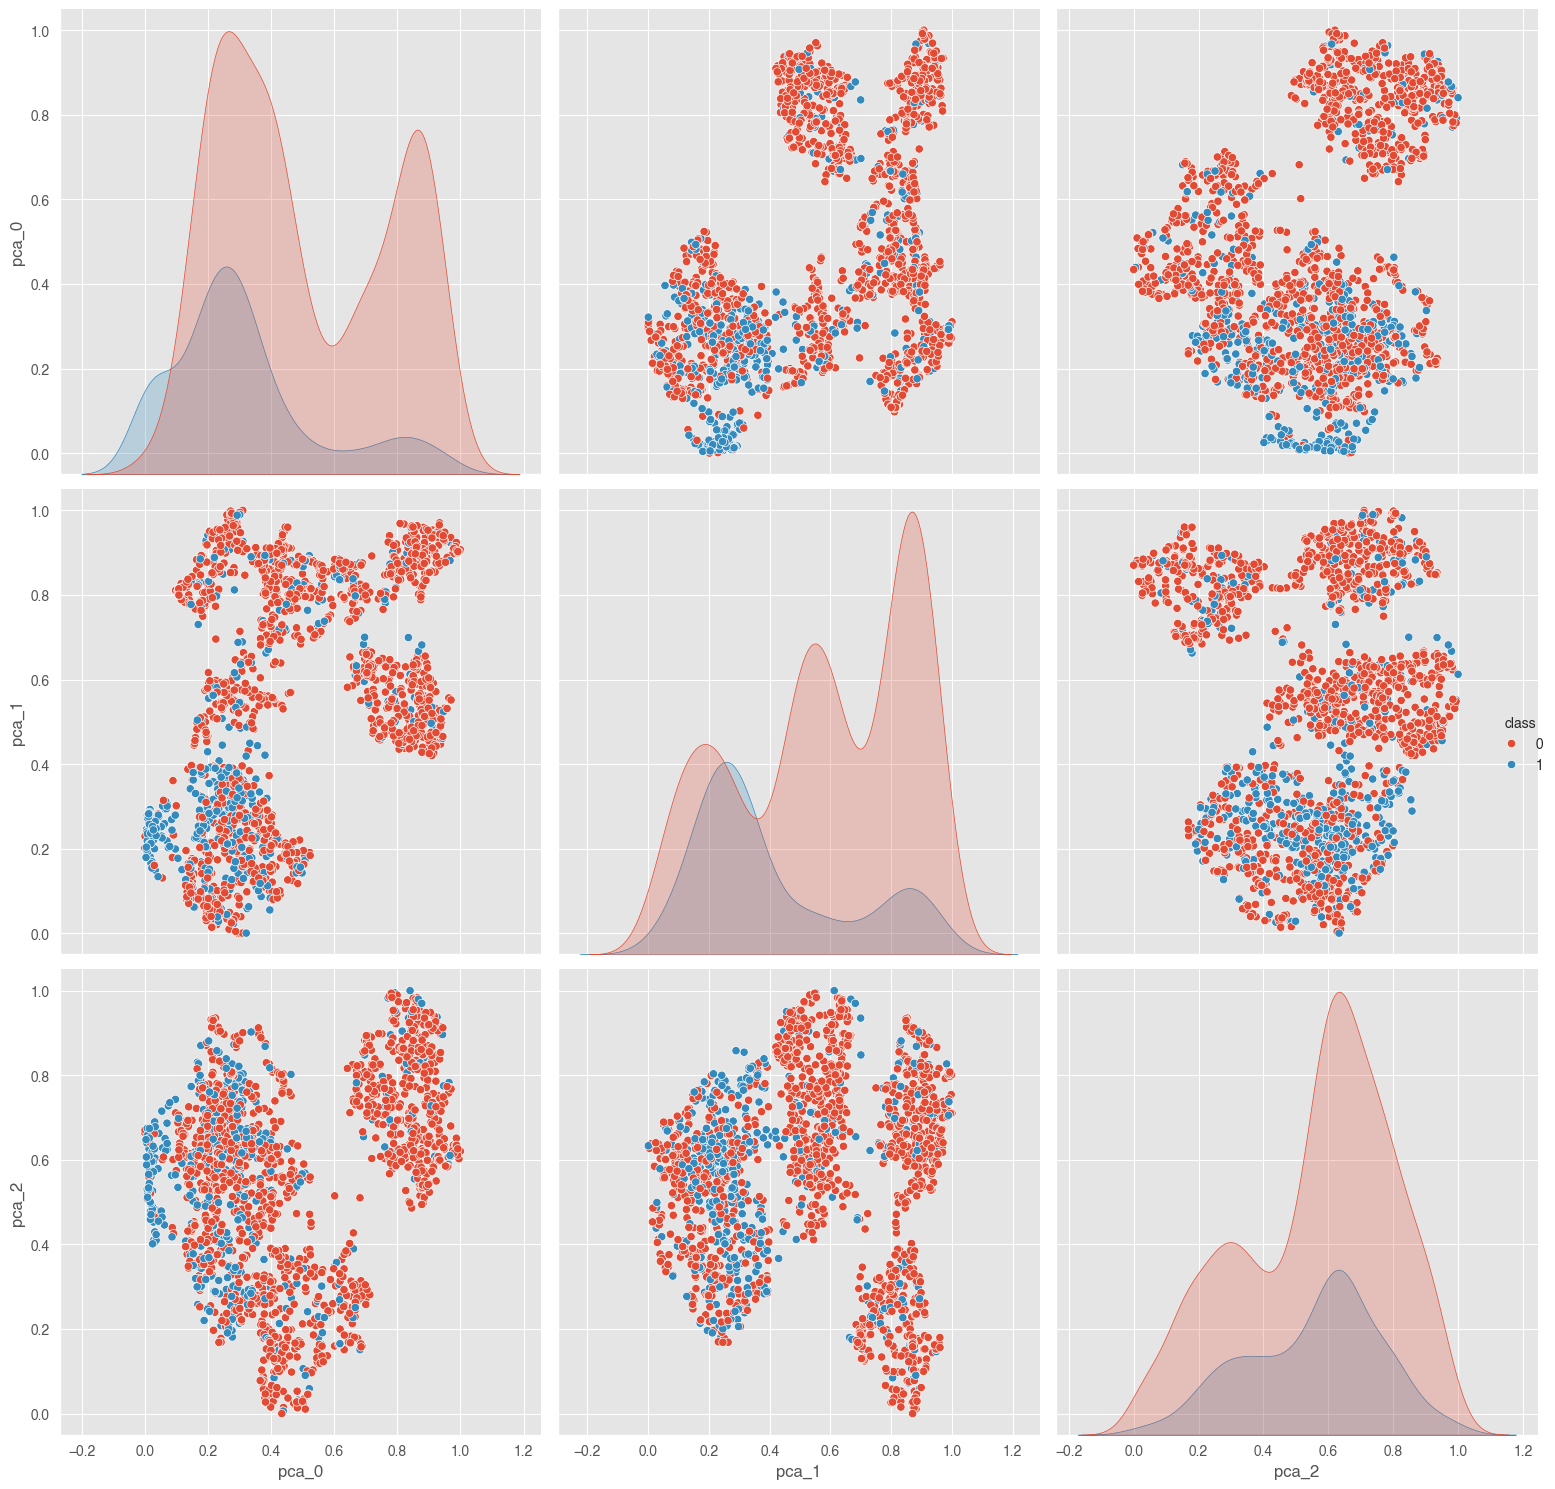

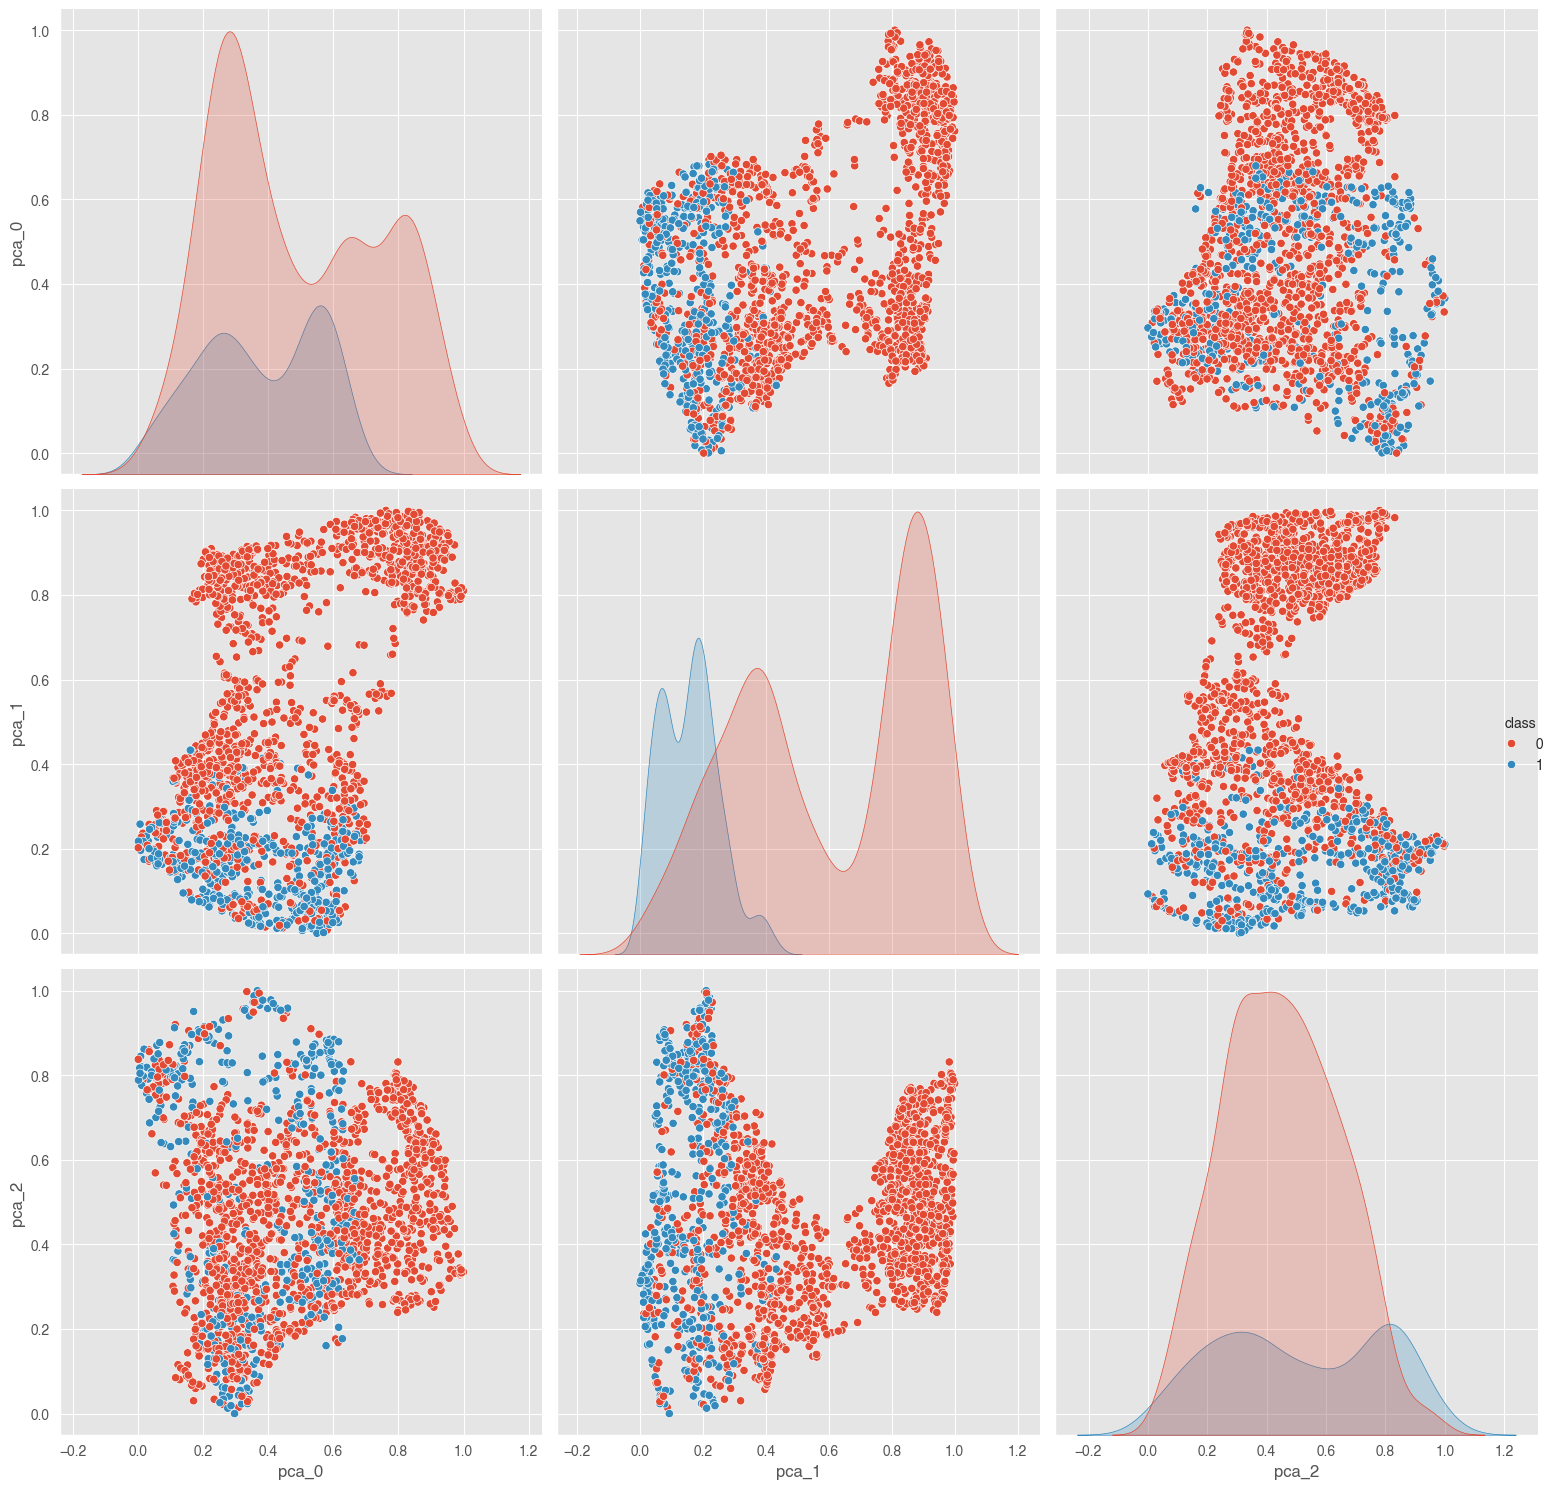

In [83]:
for y, pca in zip(sorted(Ys), sorted(PCAs)):
    filename=  pca.split(".csv")[0].split("/")[-1]
    pca_data = np.load(pca)
    y_df = np.load(y)

    pca_df = pd.DataFrame(pca_data, columns=[f"pca_{i}" for i in range(pca_data.shape[1])])
    pca_df["class"] = y_df

    filename = f"./reports/{filename}"

    create_pair_plot(pca_df, "class", filename + "_pairplot.png")

    # feature_importance(pca_df, "class", filename + "_feature_importance_pca.png")

    # visualize_umap_matrix_matplotlib(pca_data, y_df, filename + "_umap.png",title="UMAP Projection Matrix")
    # distribution_analysis(pca_df, "class", filename + "_distribution.png")

    # summary_statistics(pca_df, filename + "_summary")


In [17]:
import os
import pandas as pd


In [18]:
results_df = pd.read_csv("./quantum_results.csv")

results_df = results_df.drop(columns=["Ansatz _resp"])

results_df.head()

feature_map  feature_mpa reps entanglement     acc  minority acc   acc.1  \
0       Pauli                 1     circular  0.8000         0.558  0.7575   
1       Z map                 1     circular  0.7650         0.096  0.7425   
2          ZZ                 1     circular  0.8025         0.567  0.7625   
3       Pauli                 1         full  0.8175         0.462  0.7250   
4       Pauli                 2     circular  0.7350         0.154  0.6800   

   minority acc.1   acc.2  minority acc.2  
0           0.125  0.8550           0.757  
1           0.135  0.9125           0.757  
2           0.146  0.8650           0.806  
3           0.406  0.7950           0.767  
4           0.292  0.8000           0.806

In [122]:
grouped = results_df.groupby(["feature_map"]).agg({
    "acc": "mean",
    "minority acc": "mean",
    "acc.1": "mean",
    "minority acc.1": "mean",
    "acc.2": "mean",
    "minority acc.2": "mean",

})

grouped

acc  minority acc     acc.1  minority acc.1     acc.2  \
feature_map                                                               
Pauli        0.781875       0.44330  0.699375         0.25165  0.820875   
Z map        0.790750       0.25295  0.762375         0.14265  0.851250   
ZZ           0.773875       0.45625  0.705125         0.24905  0.820875   

             minority acc.2  
feature_map                  
Pauli                0.7825  
Z map                0.5956  
ZZ                   0.7816

In [129]:
grouped = results_df.groupby(["entanglement", "feature_mpa reps"]).agg({
    "acc": "mean",
    "minority acc": "mean",
    "acc.1": "mean",
    "minority acc.1": "mean",
    "acc.2": "mean",
    "minority acc.2": "mean",

})

grouped

acc  minority acc     acc.1  \
entanglement   feature_mpa reps                                     
circular       1                 0.789167      0.407000  0.754167   
               2                 0.752500      0.240333  0.718333   
               3                 0.737500      0.176333  0.727500   
               4                 0.824167      0.519333  0.674167   
               5                 0.802500      0.480667  0.707500   
full           1                 0.828333      0.503333  0.751667   
               2                 0.753333      0.256333  0.722500   
               3                 0.755000      0.231000  0.730833   
               4                 0.830833      0.477667  0.684167   
               5                 0.798333      0.416667  0.699167   
linear         1                 0.775000      0.589667  0.770833   
               2                 0.767500      0.301000  0.722500   
               3                 0.730000      0.134667  0.734167   
               4                 0.775000      0.439000  0.694167   
               5                 0.780833      0.542000  0.700833   
reverse_linear 1                 0.796667      0.494000  0.787500   
               2                 0.781667      0.282000  0.718333   
               3                 0.730833      0.278667  0.730000   
               4                 0.834167      0.538667  0.715000   
               5                 0.800000      0.375000  0.702500   

                                 minority acc.1     acc.2  minority acc.2  
entanglement   feature_mpa reps                                            
circular       1                       0.135333  0.877500        0.773333  
               2                       0.218667  0.825000        0.763667  
               3                       0.232667  0.827500        0.511333  
               4                       0.309000  0.830000        0.789667  
               5                       0.170333  0.804167        0.828667  
full           1                       0.239667  0.858333        0.780000  
               2                       0.357667  0.827500        0.780000  
               3                       0.243000  0.798333        0.517667  
               4                       0.197667  0.845833        0.789667  
               5                       0.132000  0.818333        0.773667  
linear         1                       0.184333  0.860000        0.793000  
               2                       0.284667  0.840833        0.763667  
               3                       0.198000  0.817500        0.530667  
               4                       0.177000  0.838333        0.779667  
               5                       0.128667  0.841667        0.789667  
reverse_linear 1                       0.128667  0.778333        0.511333  
               2                       0.316000  0.830000        0.776667  
               3                       0.177333  0.815000        0.589000  
               4                       0.291667  0.831667        0.780000  
               5                       0.166667  0.854167        0.776667

In [125]:
grouped = results_df.groupby(["feature_mpa reps",]).agg({
    "acc": "mean",
    "minority acc": "mean",
    "acc.1": "mean",
    "minority acc.1": "mean",
    "acc.2": "mean",
    "minority acc.2": "mean",

}).reset_index().sort_values(["feature_mpa reps"])

grouped

feature_mpa reps       acc  minority acc     acc.1  minority acc.1  \
0                 1  0.797292      0.498500  0.766042        0.172000   
1                 2  0.763750      0.269917  0.720417        0.294250   
2                 3  0.738333      0.205167  0.730625        0.212750   
3                 4  0.816042      0.493667  0.691875        0.243833   
4                 5  0.795417      0.453583  0.702500        0.149417   

      acc.2  minority acc.2  
0  0.843542        0.714417  
1  0.830833        0.771000  
2  0.814583        0.537167  
3  0.836458        0.784750  
4  0.829583        0.792167

In [126]:
acc_col = "acc.2"

for x in grouped["feature_map"].unique():
    # print(x)
    df = grouped[grouped["feature_map"] == x]
    df.plot(x="feature_mpa reps", y=["acc", f"minority {acc_col}"], kind="bar", title=x)
    

# pauli_df = grouped[grouped["feature_map"] == "Pauli"]
# pauli_df.plot(x="feature_mpa reps", y=["acc", "minority acc"], kind="bar", title="Pauli Feature Map")
# pauli_df.head()

KeyError: 'feature_map'

<Axes: title={'center': 'Pauli Feature Map'}, xlabel='feature_mpa reps'>

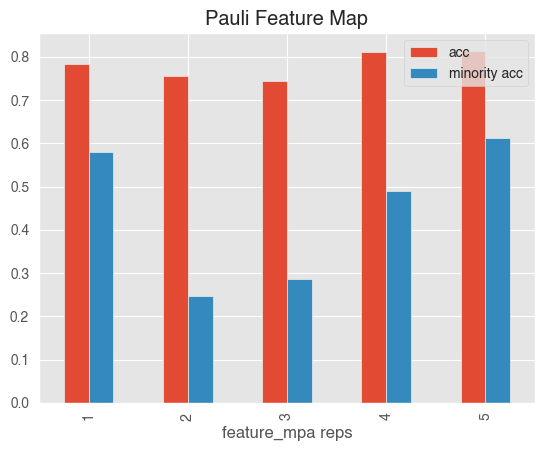

In [121]:
%pip list | grep qis

qiskit                    1.1.1
qiskit-algorithms         0.3.0
qiskit-machine-learning   0.7.2

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


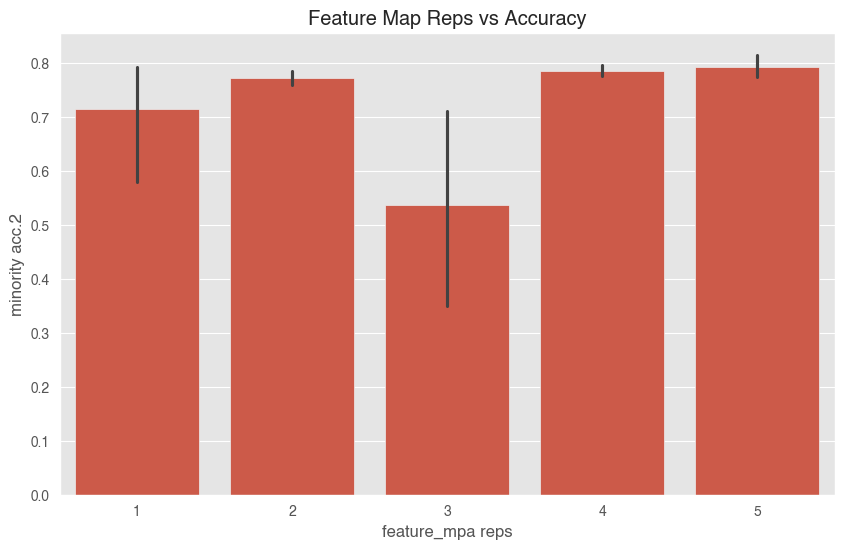

In [108]:
# Plot feature_mpa reps against acc

plt.figure(figsize=(10, 6))

sns.barplot(x="feature_mpa reps", y="minority acc.2", data=results_df)

plt.title("Feature Map Reps vs Accuracy")

plt.show()



In [100]:
results_df

feature_map  feature_mpa reps    entanglement     acc  minority acc  \
0        Pauli                 1        circular  0.8000         0.558   
1        Z map                 1        circular  0.7650         0.096   
2           ZZ                 1        circular  0.8025         0.567   
3        Pauli                 1            full  0.8175         0.462   
4        Pauli                 2        circular  0.7350         0.154   
5        Z map                 2        circular  0.8250         0.327   
6           ZZ                 2        circular  0.6975         0.240   
7        Pauli                 2            full  0.7100         0.067   
8        Pauli                 3            full  0.8050         0.462   
9        Pauli                 3          linear  0.7325         0.202   
10       Pauli                 3  reverse_linear  0.6775         0.154   
11       Pauli                 3        circular  0.7625         0.327   
12       Pauli                 4        circular  0.8275         0.538   
13       Pauli                 4  reverse_linear  0.8350         0.471   
14       Pauli                 4          linear  0.8025         0.519   
15       Pauli                 4            full  0.7800         0.433   
16       Pauli                 5        circular  0.8275         0.538   
17       Z map                 5        circular  0.7450         0.202   
18          ZZ                 5        circular  0.8350         0.702   
19       Pauli                 5            full  0.7800         0.462   
20       Z map                 1            full  0.8350         0.481   
21          ZZ                 1            full  0.8325         0.567   
22       Pauli                 1          linear  0.7525         0.663   
23       Z map                 1          linear  0.7950         0.308   
24       Z map                 2            full  0.8000         0.260   
25          ZZ                 2            full  0.7500         0.442   
26       Pauli                 2          linear  0.8175         0.442   
27       Z map                 2          linear  0.8075         0.288   
28       Z map                 3        circular  0.7400         0.000   
29       Z map                 3          linear  0.7125         0.000   
30       Z map                 3            full  0.7400         0.000   
31       Z map                 3  reverse_linear  0.7400         0.000   
32       Z map                 4        circular  0.8325         0.385   
33       Z map                 4            full  0.8400         0.413   
34       Z map                 4          linear  0.7750         0.250   
35       Z map                 4  reverse_linear  0.8775         0.558   
36       Z map                 5            full  0.8550         0.471   
37          ZZ                 5            full  0.7600         0.317   
38       Pauli                 5          linear  0.7800         0.885   
39       Z map                 5          linear  0.7000         0.154   
40          ZZ                 1          linear  0.7775         0.798   
41       Pauli                 1  reverse_linear  0.7650         0.635   
42       Z map                 1  reverse_linear  0.8325         0.385   
43          ZZ                 1  reverse_linear  0.7925         0.462   
44          ZZ                 2          linear  0.6775         0.173   
45       Pauli                 2  reverse_linear  0.7625         0.327   
46       Z map                 2  reverse_linear  0.8050         0.250   
47          ZZ                 2  reverse_linear  0.7775         0.269   
48          ZZ                 3  reverse_linear  0.7750         0.682   
49          ZZ                 3            full  0.7200         0.231   
50          ZZ                 3        circular  0.7100         0.202   
51          ZZ                 3          linear  0.7450         0.202   
52          ZZ                 4  reverse_linear  0.7900         0.587   
53     

In [16]:
pca_df = pd.DataFrame(pca_data)

pca_df["class"] = y_df

In [20]:
pca_df.head()

0         1         2  class
0  0.834877  0.895497  0.396906      0
1  0.555912  0.050941  0.519637      1
2  0.403724  0.454232  0.157859      0
3  0.509417  0.081233  0.272387      1
4  0.306566  0.737122  0.348148      0

In [39]:
summary_statistics(pca_df)

0            1            2        class
count  2000.000000  2000.000000  2000.000000  2000.000000
mean      0.459440     0.493822     0.465972     0.250000
std       0.241330     0.320508     0.219960     0.433121
min       0.000000     0.000000     0.000000     0.000000
25%       0.263789     0.202886     0.297603     0.000000
50%       0.418037     0.402436     0.448021     0.000000
75%       0.639984     0.845282     0.629125     0.250000
max       1.000000     1.000000     1.000000     1.000000

/var/folders/q0/h9mqwfbj4xqd1v4zbpl4ywn80000gn/T/ipykernel_19539/4010412967.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=class_column, loc='upper right')
/var/folders/q0/h9mqwfbj4xqd1v4zbpl4ywn80000gn/T/ipykernel_19539/4010412967.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=class_column, loc='upper right')
/var/folders/q0/h9mqwfbj4xqd1v4zbpl4ywn80000gn/T/ipykernel_19539/4010412967.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=class_column, loc='upper right')


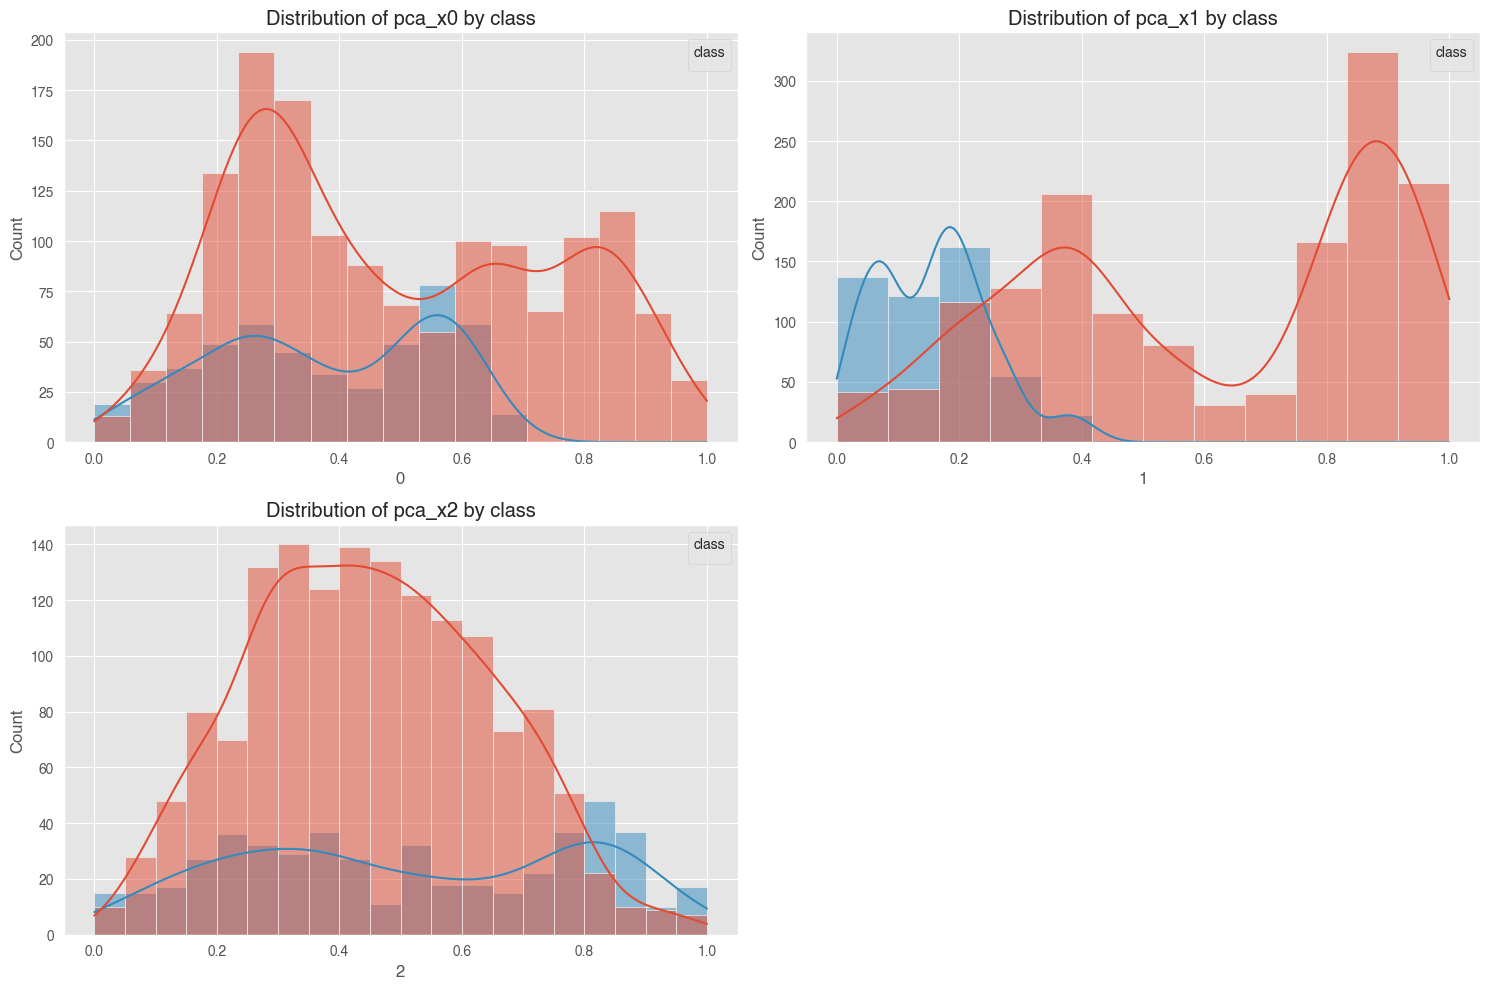

In [38]:


distribution_analysis(pca_df, 'class')